<a href="https://colab.research.google.com/github/karanziie1990/PRML-24_Project/blob/pca_keshika/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
from matplotlib import image as mpimg
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from keras.datasets import cifar10
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from pathlib import Path
from sklearn.cluster import KMeans

In [14]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Flatten the images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Convert to float32 for numerical stability
X_train_flat = X_train_flat.astype('float32')
X_test_flat = X_test_flat.astype('float32')

# Normalize the data to range [0,1]
X_train_flat /= 255
X_test_flat /= 255

n_components_values = [50, 100, 200, 300]
accuracy_values_knn = []
accuracy_values_kmeans = []
accuracy_values_svc_rbf = []

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


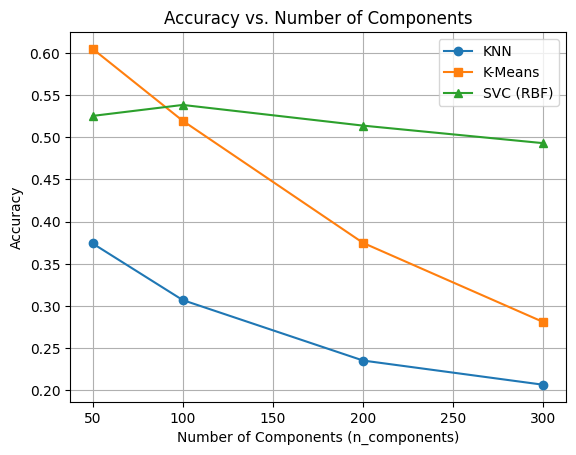

In [15]:
# Iterate over n_components_values
for n_components in n_components_values:
    # Apply PCA
    pca = PCA(n_components=n_components, whiten=True)
    pca.fit(X_train_flat)  # Use full training data

    # Transform data
    X_train_pca = pca.transform(X_train_flat)
    X_test_pca = pca.transform(X_test_flat)

    # KNN
    clf_knn = KNeighborsClassifier(n_neighbors=5)
    clf_knn.fit(X_train_pca, y_train.ravel())  # Flatten y_train
    accuracy_knn = clf_knn.score(X_test_pca, y_test.ravel())  # Flatten y_test
    accuracy_values_knn.append(accuracy_knn)

    # K-Means
    kmeans = KMeans(n_clusters=len(np.unique(y_train)))
    kmeans.fit(X_train_pca)
    y_train_kmeans = kmeans.predict(X_train_pca)
    y_test_kmeans = kmeans.predict(X_test_pca)
    clf_kmeans = KNeighborsClassifier(n_neighbors=5)
    clf_kmeans.fit(X_train_pca, y_train_kmeans)
    accuracy_kmeans = clf_kmeans.score(X_test_pca, y_test_kmeans)
    accuracy_values_kmeans.append(accuracy_kmeans)

    # SVC with RBF kernel
    clf_svc_rbf = SVC(kernel='rbf', C=0.5, gamma='scale', random_state=42)
    clf_svc_rbf.fit(X_train_pca, y_train.ravel())  # Flatten y_train
    accuracy_svc_rbf = clf_svc_rbf.score(X_test_pca, y_test.ravel())  # Flatten y_test
    accuracy_values_svc_rbf.append(accuracy_svc_rbf)

# Plot accuracy vs number of components for each classifier
plt.plot(n_components_values, accuracy_values_knn, marker='o', label='KNN')
plt.plot(n_components_values, accuracy_values_kmeans, marker='s', label='K-Means')
plt.plot(n_components_values, accuracy_values_svc_rbf, marker='^', label='SVC (RBF)')
plt.xlabel('Number of Components (n_components)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Components')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# Compute the mean of each feature
mean_vector = np.mean(X_train_flat, axis=0)

# Center the data
X_centered = X_train_flat - mean_vector

# Compute the covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)

# Perform eigendecomposition
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvectors by eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Select the top n eigenvectors
n_components = 50
selected_eigenvectors = sorted_eigenvectors[:, :n_components]

# Project the centered data onto the selected eigenvectors
X_train_pca = np.dot(X_centered, selected_eigenvectors)

print("Shape of X_train_pca:", X_train_pca.shape)

Shape of X_train_pca: (50000, 50)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Enter the class label (0-9): 6


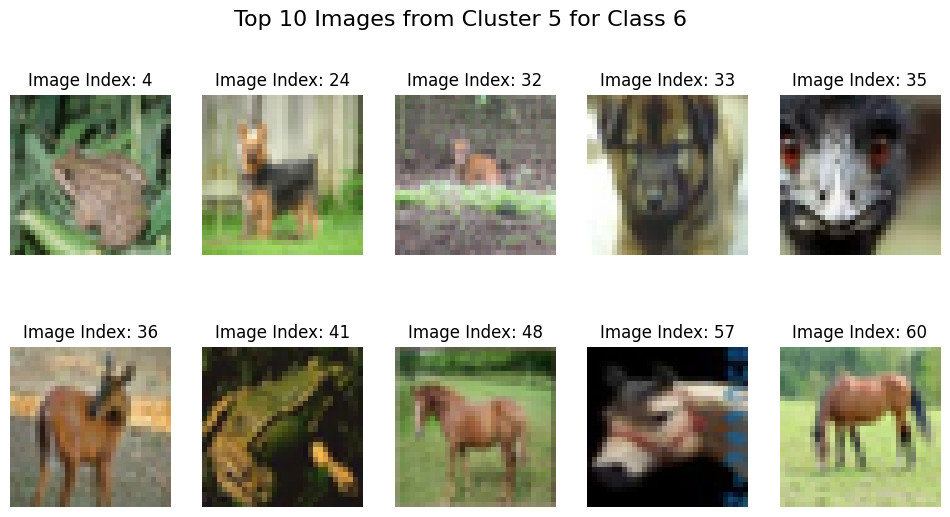

In [17]:
# Apply K-means clustering on the testing data
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_test_pca)
cluster_labels = kmeans.labels_

# Function to retrieve top n images from the same cluster
def get_top_images(cluster_labels, target_cluster, n=10):
    cluster_indices = np.where(cluster_labels == target_cluster)[0]
    top_indices = cluster_indices[:n]
    return top_indices

def get_cluster_label_for_class(class_label, y_test, cluster_labels):
    y_test_flat = y_test.flatten()
    class_indices = np.where(y_test_flat == class_label)[0]
    class_cluster_labels = cluster_labels[class_indices]
    cluster_label_counts = np.bincount(class_cluster_labels)
    return np.argmax(cluster_label_counts)

# User input for class label
class_label = int(input("Enter the class label (0-9): "))

# Get cluster label for the specified class
predicted_cluster = get_cluster_label_for_class(class_label, y_test, cluster_labels)

# Get top 10 images from the same cluster
top_indices = get_top_images(cluster_labels, predicted_cluster)

# Display top images
plt.figure(figsize=(12, 6))
for i, idx in enumerate(top_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx])
    plt.title(f"Image Index: {idx}")
    plt.axis('off')
plt.suptitle(f"Top 10 Images from Cluster {predicted_cluster} for Class {class_label}", fontsize=16)
plt.show()


In [19]:
def purity_score(y_true, y_pred):
    # Compute contingency matrix
    contingency_matrix = np.zeros((10, 10))
    for true_label, pred_label in zip(y_true, y_pred):
        contingency_matrix[pred_label, true_label] += 1

    # Match each cluster to the class with the most instances
    cluster_to_class = np.argmax(contingency_matrix, axis=1)

    # Compute purity
    purity = np.sum(np.max(contingency_matrix, axis=1)) / np.sum(contingency_matrix)

    return purity

# Calculate purity
purity = purity_score(y_test.flatten(), cluster_labels)
print("Purity:", purity*100)


Purity: 18.709999999999997
